In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crimedata.csv")

In [3]:
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


In [4]:
df['total']=df.iloc[:,-12:].sum(axis=1)
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,total
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6,24
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0,6
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2,15
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5,102


##### State Wise Crime Analysis

In [5]:
from IPython.html import widgets
from IPython.display import display
from ipywidgets import widgets, interactive
state = widgets.Dropdown(
    options=['All'] + list(df['STATE/UT'].unique()),
    value='All',
    description='STATE/UT:',
)
def plot(state):
    
    if state=="All":
        plt.figure(figsize=(10,4))
        plt.barh(df["CRIME HEAD"],df["total"] ,color='green', align='center')
        plt.title("Total Crime")
        plt.ylabel("Crime Type")
        plt.xlabel("No.of Crimes")
    else:
        p=df[df["STATE/UT"]==state]
        plt.figure(figsize=(10,4))
        plt.barh(p["CRIME HEAD"],p['total'],color="brown",label="State "+str(state))
        plt.title("Total Crime in "+str(state))
        plt.ylabel("Crime Type")
        plt.xlabel("No.of Crimes")
        plt.legend(loc=0)
interactive(plot,state=state)

interactive(children=(Dropdown(description='STATE/UT:', options=('All', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH',…

##### Crime wise State Analysis

In [6]:
from IPython.html import widgets
from IPython.display import display
from ipywidgets import widgets, interactive
crime = widgets.Dropdown(
    options=['All'] + list(df['CRIME HEAD'].unique()),
    value='All',
    description='Crime:',
)
def plot(crime):
    
    if crime=="All":
            plt.figure(figsize=(10,4))
            state=df[["STATE/UT","total"]].groupby(df["STATE/UT"]).sum()
            s_state=state.sort_values(["total"],ascending=False)
            l=[i[0] for i in s_state.values[2:,]]
            np.array(l)
            plt.figure(figsize=(10,6))
            plt.bar(s_state.index[2:,],np.array(l),align='center')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            plt.title("State Wide Crime Analysis")
            plt.xlabel("State Name")
            plt.ylabel("No.of Crimes")
    else:
        p=df[df["CRIME HEAD"]==crime]
        plt.figure(figsize=(10,4))
        state=p[["STATE/UT","total"]].groupby(p["STATE/UT"]).sum()
        s_state=state.sort_values(["total"],ascending=False)
        l=[i[0] for i in s_state.values[2:,]]
        np.array(l)
        plt.figure(figsize=(10,6))
        plt.bar(s_state.index[2:,],np.array(l),align='center')
        plt.xticks(rotation='vertical')
        plt.tight_layout()
        plt.title("State Wide Crime Analysis "+str(crime))
        plt.xlabel("State Name")
        plt.ylabel("No.of Crimes")
interactive(plot,crime=crime)

interactive(children=(Dropdown(description='Crime:', options=('All', 'INFANTICIDE', 'MURDER OF CHILDREN', 'RAP…

In [7]:
df.columns

Index(['STATE/UT', 'CRIME HEAD', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', 'total'],
      dtype='object')

Text(0.5, 1.0, 'Year wise crime growth')

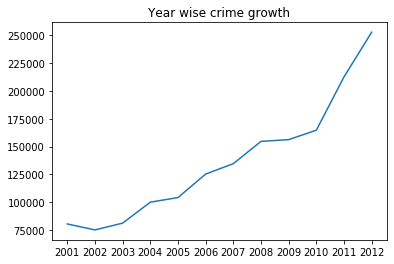

In [8]:
l1=[df[str(i)].sum() for i in df.columns[2:-1]]
sns.lineplot(df.columns[2:-1],l1)
plt.title("Year wise crime growth")